# Versuch 4
## Kritischer Punkt
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen? Die allgemeinen bereits bekannten und vorausgetzten Python-Kompetenzen könnt ihr unter [Anforderungen.ipynb](Anforderungen.ipynb) nachlesen. Dort sind auch einige Ratschläge bspw. zum Exportieren von Grafiken oder Hinweise zu <code>NumPy</code> aufgeführt.

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Wenn ihr wollt, könnt ihr auch einige für die Auswertung notwendige Naturkonstanten bereits jetzt importieren von <code>scipy.constants</code>. Bedenkt, dass ihr diese Variablennamen nicht erneut nutzen solltet in der Auswertung! Sinnvoll wären z.&nbsp;B. die universelle Gaskonstante $R$, die Standardbeschleunigung $g$ und auch feste Variablen wie Messunsicherheiten oder die Anfangshöhe können hier definiert werden!

Es ist sinnvoll, bereits jetzt etwaige Konstanten zu definieren, oder Werte für den studentschen $t$-Faktor einzutragen. Achtet wenn notwendig auf die Einheiten!

In [2]:
from Hilfsdateien.importe_Konstanten import *

h_0 = 27.93 #cm
theta_0 = 23.3 #°C
p_0 = 23.6 #bar

h_l = 29.07 #cm
l_kap = 29.8 #cm

d_l = 0.1 #cm
d_theta = 0.1 #°C
d_p = 0.1 #bar
d_h_kap = 0.01 #cm

p_k = 39.7 #bar
theta_k = 194.0 #°C
h_k = 31.21 #cm

theta_arr = np.array([175,185,195,210],dtype=int)

rho_dieth = 0.71 #g/cm³, 20°C

## Erster Auswertungsschritt
Zunächst wollen wir unsere Messwerte in ein 3D-Array mit <code>numpy</code> einlesen und daher zunächst ein leeres 3D-Array mit den passenden Dimensionen erstellen. Hierbei werdet ihr vermutlich mit folgendem Problem umgehen müssen: Die Messreihen sind vermutlich unterschiedlich lang, sodass einem leeren 3D-Array die Werte nicht ohne Weiteres mittels einer Schleife zugewiesen werden können&nbsp;– es würde eine Fehlermeldung wegen der unterschiedlichen Dimensionen erscheinen. Allerdings könnt ihr ein mit <code>np.nan</code> gefülltes 3D-Array erstellen, welches sich an der Größe der längsten Messreihe orientiert (hierfür gibt es einen spezifischen NumPy-Befehl, sodass ihr nur eine Code-Zeile braucht!). Daher sollt ihr nun bei $n$ Messreihen mit maximal $j$ Messwertepaaren und $k$ Messgrößen ein 3D-Array mit den entsprechenden Dimensionen erstellen. 

In [3]:
#Dimensionen des Array
n,j,k = 4,34,2
data_arr = np.full((n,j,k),np.nan)

Mittels <code>enumerate</code> kann sowohl ein Index als auch der Wert eines Elements in einem Array übertragen werden. Die erste Variable ist immer der Index und die Zweite der Eintrag im Array. Wir wollen enumerate über ein Array laufen lassen, welches die Pfade zu den Dateien mit unseren Messwerten enthält. Mit welchem Numpy-Befehl _generieren_ wir in Python aus z.&nbsp;B. txt-Dateien (aber natürlich auch aus csv, dat,…) Arrays?

Die Messwerte bei einem Index $i$ können dem $i$-ten Element in unserem 3D-Array zugewiesen werden, sodass alle Messreihen in einem großen Array gespeichert sind.

In [4]:
for i,name in enumerate(["T1.dat","T2.dat","T3.dat","T4.dat"]):
    data = np.genfromtxt("data_v4/"+name,skip_header=1,dtype=float)
    data_arr[i,:data.shape[0]] = data

Eure Aufgabe ist es nun, die Drücke $p$ als Funktion der Höhe $h = h_\mathrm{x} - h_0$ grafisch darzustellen, die einzelnen Isothermen haben laut Aufgabenstellung in einem Diagramm zu sein. $h_0$ bezeichnet die Höhe am oberen Ende der Kapilla und $h_\mathrm{x}$ die Höhe während der Messreihe. Achtet in der Auftragung wie üblich auf die Achsenbeschriftung, Legende, etc. 

Tipps:
1. Mittels einer <code>for</code>- oder <code>enumerate</code>-Schleife könnt ihr syntaxsparend die einzelnen Messreihen in der Abbildung auftragen.
2. Ein sinnvolles Farbschema (bspw. blau bei kalten Temperaturen und gelb bei hohem $\vartheta$) erleichtert es, Trends in der Grafik zu erkennen.

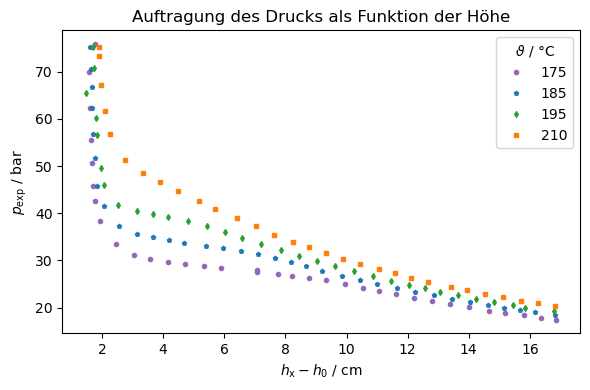

In [5]:
marker_arr = ["o","p","d","s"]
color_arr = ['tab:purple','tab:blue','tab:green','tab:orange']
for index,data  in enumerate(data_arr):
    plt.plot(data[:,1] - h_0,data[:,0],color=color_arr[index],marker=marker_arr[index],markersize=3,ls="None",label=theta_arr[index])
plt.legend(title=r"$\vartheta$ / °C")
plt.ylabel("$p_\mathrm{exp}$ / bar")
plt.xlabel("$h_\mathrm{x} - h_0$ / cm")
plt.title("Auftragung des Drucks als Funktion der Höhe")
plt.tight_layout()
plt.show()
plt.close()

## Zweiter Auswertungsschritt
Im nächsten Schritt habt ihr aus dem Volumen $V$ und der Dichte $\rho$ der Flüssigkeit die Stoffmenge $n$ an Diethylether zu bestimmen. Das Volument habt ihr aus der Kapillarhöhe und dem Innendurchmesser unter Annahme eines Zylinders zu bestimmen. Da wie üblich auch die Unsicherheit von $n$, $\Delta n$ zu bestimmen ist, wollen wir hierzu <code>sympy</code> nutzen. Hierzu müssen zu Beginn einige Variablen als „Symbole“ einer Funktion $f(a,b,c,\dots)$ definiert werden. SymPy ermöglicht es uns, bspw. automatisch Ableitungen von dieser Funktion zu bestimmen. Für Details sei auf die Dokumentation verwiesen.

In [6]:
h0,dh0,hexp,dhexp,d,rho,M = symbols('h_0 Δh_0 h_exp d Δh_exp ρ M')
ndieth = ((hexp - h0)*np.pi*(d/2)**2 - np.pi/3*(d/2)**3)*rho/M
dndieth = sqrt((diff(ndieth,h0)*dh0)**2 + (diff(ndieth,hexp)*dhexp)**2)

Nachdem die Ausdrücke mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt wurden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!), können wir unsere Messwerte an diese übergeben und so die Siedetemperatur berechnen.

In [7]:
ndieth = lambdify([hexp,h0,d,rho,M],ndieth,'scipy')
dndieth = lambdify([hexp,dhexp,h0,dh0,d,rho,M],dndieth,'scipy')

Diese Funktionen wollen wir nun mit unseren Messwerten aufrufen.

In [8]:
n_dieth = ndieth(h_l,h_0,0.16,0.71,74.12)
dn_dieth = dndieth(h_l,d_l,h_l,d_h_kap,0.16,0.71,74.12)
print(np.array2string(np.array([n_dieth,dn_dieth]),separator=" ± "))

[2.144e-04 ± 1.936e-05]


## Dritter Auswertungsschritt
Die experimentellen Drücke $p_\mathrm{exp}$ sollen in absolute Drücke $p_\mathrm{abs}$ umgerechnet werden. Wie könnte dies mit Hilfe der Quecksilbersäule gelingen? Idealerweise nutzt ihr erneut SymPy um eine Funktion für $p_\mathrm{abs}$ zu erstellen und zur Fehlerfortpflanzung.

In [9]:
pexp,dpexp = symbols("p_exp Δp_exp")
pabs = pexp - rho*g*hexp
dpabs = sqrt((diff(pabs,pexp)*dpexp)**2 + (diff(pabs,hexp)*dhexp)**2)

pabs  = lambdify([pexp,rho,hexp],pabs,'scipy')
dpabs = lambdify([pexp,dpexp,rho,hexp,dhexp],dpabs,'scipy')

Diese Funktion soll in der nachfolgenden <code>for</code>-Schleife genutzt werden. Analog zum 3D-Array mit allen Messreihen wollen wir je ein 2D-Array mit allen Ergebnissen für $p_\mathrm{abs}$ und $\Delta p_\mathrm{abs}$ erstellen (ein einzelnes 3D-Array wäre aber auch möglich, es müsste bloß immer entsprechend der Index übergeben werden!). Da hier ebenfalls das Problem besteht, dass die Messreihen unterschiedlich lang sind, sollte erneut ein großes mit <code>np.nan</code> gefülltes Array erstellt werden, dem dann die einzelnen Werte zugewiesen werden.

In [10]:
#Wir brauchen die Temperaturabhängige Dichte von Quecksilber
rho_Hg_arr = np.array([13.1836,13.1478,13.1240,13.0882])*10**3 #kg/m³
p_abs = np.full((n,j),np.nan)
dp_abs = np.full((n,j),np.nan)
for index in np.arange(len(data_arr)):
    p_abs[index]  = pabs(data_arr[index,:,0]*10**5,rho_Hg_arr[index],(h_0 - data_arr[index,:,1])/100) #Pa
    dp_abs[index] = dpabs(data_arr[index,:,0]*10**5,d_p*10**5,rho_Hg_arr[index],(h_0 - data_arr[index,:,1])/100,d_h_kap/100) #Pa

Außerdem ist es eure Aufgabe, dass molare Volumen $V_\mathrm{m}$ zu ermitteln. Wie ist dieses definiert und wie erhaltet ihr dieses aus den bereits zuvor bestimmten Größen (Fehlerrechnung nicht vergessen!). Die einzelnen Schritte sind analog zu denen für $p_\mathrm{abs}$.

In [11]:
stoffn,dstoffn = symbols('n Δn')
Vm = ((hexp - h0)*np.pi*(d/2)**2 - np.pi/3*(d/2)**3)/stoffn
dVm = sqrt((diff(Vm,h0)*dh0)**2 + (diff(Vm,hexp)*dhexp)**2 + (diff(Vm,stoffn)*dstoffn)**2)

Vm  = lambdify([h0,hexp,d,stoffn],Vm,'scipy')
dVm = lambdify([h0,dh0,hexp,dhexp,d,stoffn,dstoffn],dVm,'scipy')
V_m = np.full((n,j),np.nan)
dV_m = np.full((n,j),np.nan)
for index in np.arange(len(data_arr)):
    V_m[index] = Vm(h_0/100,data_arr[index,:,1]/100,0.16/100,n_dieth) #m³/mol
    dV_m[index] = dVm(h_0/100,d_h_kap/100,data_arr[index,:,1]/100,d_h_kap/100,0.16/100,n_dieth,dn_dieth) #m³/mol
    #print(np.column_stack((V_m[index],dV_m[index])))

Abschließend ist von euch eine Auftragung von $p_\mathrm{abs}$ gegen $V_\mathrm{m}$ anzufertigen. In dieser ist jeweils zu kennzeichnen, ob ein Zweiphasengebiet vorliegt oder nicht. 

Hierzu wollen wir aus NumPy das Konzept der [maskierten Arrays](https://numpy.org/doc/stable/reference/maskedarray.generic.html) mittels <code>np.ma.array</code> nutzen, es ist empfehlenswert einen Blick auf die Dokumentation zu werfen! An diesen Befehl wird das Ausgangsarray übergeben und ein weiteres Array, welches angibt, ob der Bereich zu maskieren ist, oder nicht. Ein maskierter Bereich ist noch immer im Array gespeichert, wird aber für weitere Befehle durch die Maske „verdeckt“. Zum besseren Verständnis ist unten ein interaktives Code-Beispiel aufgeführt, zum Ausführen immer „Run Interact“ drücken.

In [12]:
#Beispiel zum besseren Verständnis von maskierten Arrays
#Import nur, damit der Button für die Interaktivität vorhanden ist
from ipywidgets import interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

def update(maske,region,invertiert):
    x = np.linspace(0,100,10**3)
    y = 10 * x**2 * np.exp(-1/3*x)
    if maske == True:
        if invertiert != True:
            #Maskiert alle x-Werte in dem bestimmten Bereich
            x_plot = np.ma.masked_inside(x,region[0],region[1])
            #Wir wollen die Maske übernehmen
            y_plot = np.ma.array(y,mask=x_plot.mask)
        if invertiert == True:
            x_plot = np.ma.masked_inside(x,region[0],region[1])
            y_plot = np.ma.array(y,mask=~x_plot.mask)
            x_plot.mask = ~x_plot.mask
    elif maske == False:
        #Wenn die Maske nicht aktiv sein soll, soll auch nichts maskiert sein
        x_plot,y_plot = x,y
    plt.plot(x_plot,y_plot)
    plt.show()

#Zum Ausführen IMMER Run Interact drücken (der ist hier im Code nicht aufgeführt)
interact_manual(update,maske=widgets.ToggleButton(value=False,description="Maske?"),invertiert=widgets.ToggleButton(value=False,description="Maske invertieren?"),region=widgets.IntRangeSlider(value=[40,60],min=0,max=100,step=1,description='Maskierter Bereich',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='d',))

interactive(children=(ToggleButton(value=False, description='Maske?'), IntRangeSlider(value=(40, 60), descript…

<function __main__.update(maske, region, invertiert)>

Nach diesem Beispiel sollt ihr nun entsprechend das Konzept der maskierten Arrays auf eure Daten anwenden. Beispielsweise kann das Zweiphasengebiet als zu maskierender Bereich festgelegt werden. Wird das maskierte Array nun an PyPlot übergeben, wird der maskierte Bereich _nicht_ aufgetragen werden, et vice versa. Mittels einer Tilde kann der zu maskierende Bereich invertiert werden, also anstelle des Zweiphasengebiets das Einphasengebiet maskiert werden.

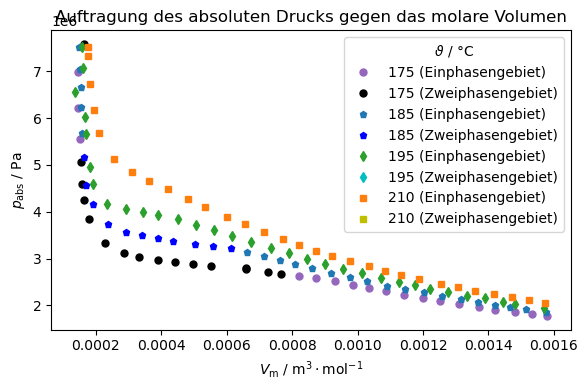

In [13]:
plt.figure(figsize=(6,4))
color_arr = np.array([["tab:purple","tab:blue","tab:green","tab:orange"],
                      ["k","b","c","y"]])

#Aus dem Datensatz die Region, wo das 2-Phasengebiet war
#Es wird die Höhe der Säule genommen
#Die Maske wird später kopiert und auf die anderen Arrays angewandt
mask_region = np.array([[36.69,29.58],[34.49,29.68],[998,999],[998,999]])

maske_alle = np.full((n,j),False)
for i in range(n):
    low,high = mask_region[i]
    #Gibt uns durch .mask nur die Maske zurück
    mask = np.ma.masked_inside(data_arr[i,:,1],low,high).mask
    #print(mask)
    maske_alle[i] = mask
    plt.errorbar(x=np.ma.array(V_m[i],mask=mask),y=np.ma.array(p_abs[i],mask=mask),color=color_arr[0,i],label=str(theta_arr[i]) + " (Einphasengebiet)",marker=marker_arr[i],markersize=5,ls="None")
    plt.errorbar(x=np.ma.array(V_m[i],mask=~mask),y=np.ma.array(p_abs[i],mask=~mask),color=color_arr[1,i],label=str(theta_arr[i]) + " (Zweiphasengebiet)",marker=marker_arr[i],markersize=5,ls="None")
plt.legend(title=r"$\vartheta$ / °C")
plt.ylabel(r"$p_\mathrm{abs}$ / Pa")
plt.xlabel(r"$V_\mathrm{m}$ / $\mathrm{m}^{3}\cdot\mathrm{mol}^{-1}$")
plt.title("Auftragung des absoluten Drucks gegen das molare Volumen")
plt.tight_layout()
plt.show()
plt.close()


## Vierter Auswertungsschritt
Die Messergebnisse sollen anhand der Clausius-Clapeyron-Gleichung (CCG) mit Literaturwerten verglichen werden.
\begin{align}
    \frac{\partial \ln(p)}{\partial T^{-1}} = -\frac{\Delta_{\mathrm{vap}}H}{R}
\end{align}
Entsprechend ist es eure Aufgabe, Literaturwerte für die Verdampfungsenthalpie und die Normalsiedetemperatur zu finden und als Variablen zu definieren.

In [14]:
H_vap = 26520 #J/mol
T_vap = 307.7 #K
p_theo = (np.exp(H_vap/R*(1/T_vap - 1/(273.15+theta_arr)) + np.log(1.101325)))*10**5 #Pa
print(p_theo)

[2836676.703 3313424.059 3844695.168 4750359.192]


Dieses können dann mit dem Mittelwert der Messwerte im Zweiphasengebiet verglichen werden.

In [29]:
mittelwert = np.empty(n)
for i in range(n):
    mittelwert[i] = np.mean(np.ma.array(p_abs[i],mask=~maske_alle[i]))
    print(p_abs[i])

[1771810.709 1811164.274 1860440.267 1909625.759 1958953.467 2028100.173
 2097298.594 2156561.658 2225785.937 2305010.215 2364312.065 2433639.773
 2512876.98  2592075.401 2631338.466 2680601.53  2720032.667 2769127.659
 2809127.659 2847627.93  2886903.923 2926115.273 2965391.266 3034628.473
 3123956.181 3343180.459 3842508.167 4252275.45  4582184.949 5072146.163
 5562107.377 6222055.663 6992042.734 7582275.45 ]
[1861699.907 1920861.824 1970204.251 2019546.678 2078850.425 2138115.49
 2207328.981 2276581.153 2345794.644 2425033.923 2514195.84  2603448.012
 2692687.29  2791874.994 2891165.847 2970534.061 3059863.594 3149141.553
 3218445.3   3267697.472 3316962.537 3386021.305 3435389.519 3494719.053
 3574048.586 3743300.758 4162668.973 4572359.526 5162269.271 5682204.803
 6232153.229 6672140.335 7052114.548 7522088.761]
[1951596.275 2020373.602 2079871.662 2149099.447 2208340.103 2287567.888
 2356808.543 2426165.031 2495508.648 2584736.433 2683964.218 2783166.263
 2892394.048 3001621.833 

/tmp/ipykernel_239/3272566400.py:3: UserWarning: Warning: converting a masked element to nan.
  mittelwert[i] = np.mean(np.ma.array(p_abs[i],mask=~maske_alle[i]))


## Fünfter Auswertungsschritt
## Praktikumsskript umschreiben
Die nächste Aufgabe ist es, den kritischen Punkt zu bestimmen und den Druck $p_\mathrm{k}$, die Temperatur $T_\mathrm{k}$ und das Volumen $V_\mathrm{k}$ zu bestimmen.

__DIE WERDEN BEREITS EXPERIMENTELL BESTIMMT. SKRIPT UMSCHREIBEN__

## Sechster Auswertungsschritt
Der Kompressibilitätsfaktor $Z_\mathrm{k}$ soll nachfolgend bestimmt werden. $Z$ ergibt sich nach der im Praktikumsskript aufgeführten Gleichung
\begin{align}
    Z = \frac{p\cdot V_\mathrm{m}}{R\cdot T} = \left(1 + \frac{B}{V_\mathrm{m}} + \frac{C}{V_\mathrm{m}^{2}} + \dots\right).
\end{align}
Hierzu benötigen wir das kritische molare Volumen $V_\mathrm{m,k}$, welches aus unseren Messwerten mittels der Funktion für $V_\mathrm{m}$ bestimmt werden kann. Setzt nun die entsprechenden Werte in die Funktion ein, um $V_\mathrm{m,k}$ zu erhalten.

In [24]:
V_mk = Vm(h_0/100,h_k/100,0.16/100,n_dieth) #m³/mol
dV_mk = dVm(h_0/100,d_h_kap/100,h_k/100,d_h_kap/100,0.16/100,n_dieth,dn_dieth) #m³/mol

print("V_m,kritisch: " + np.array2string(np.array([V_mk,dV_mk]),separator=" ± ")+" m³/mol")

V_m,kritisch: [3.051e-04 ± 2.757e-05] m³/mol


Die nächste Aufgabe von euch ist es, $Z_\mathrm{k}$ aus den Messwerten und Messergebnissen zu erhalten. Macht dies mittels SymPy!

In [17]:
#R damit das Gleichungenumstellen besser klappt
T,dT,v_mol,dv_mol = symbols('T ΔT V_m ΔV_m')

Z = pexp*v_mol/(R*T)
dZ = sqrt((diff(Z,pexp)*dpexp)**2 + (diff(Z,v_mol)*dv_mol)**2 + (diff(Z,T)*dT)**2)

Z = lambdify([pexp,v_mol,T],Z,'scipy')
dZ = lambdify([pexp,dpexp,v_mol,dv_mol,T,dT],dZ,'scipy')
Z_k = Z(p_k*10**5,V_mk,theta_k+273.15)
dZ_k = dZ(p_k*10**5,d_p*10**5,V_mk,dV_mk,theta_k+273.15,d_theta)
print("Z: " + np.array2string(np.array([Z_k,dZ_k]),separator=" ± "))

Z: [0.312 ± 0.028]


Als nächstes ist von euch die Gleichung
\begin{align}
    Z = \frac{p\cdot V_\mathrm{m}}{R\cdot T} = \left(1 + \frac{B}{V_\mathrm{m}} + \frac{C}{V_\mathrm{m}^{2}} + \dots\right)
\end{align}
nach $p$ umzustellen. Dies kann manuell oder mittels SymPy geschehen. Im letzteren Fall könntet ihr beispielsweise alle Terme auf eine Seite ziehen und die Lösung von $p$ suchen (für Details sei auf die Dokumentation verwiesen!).

In [18]:
B_coeff, C_coeff = symbols("B C")
expr = -pexp*v_mol/(R*T) + (1 + B_coeff/v_mol + C_coeff/v_mol**2)
p_krit = solve(expr,pexp)[0]

pprint(expand(p_krit))

8.31446261799998⋅B⋅T   8.31446261799998⋅C⋅T   8.31446261799998⋅T
──────────────────── + ──────────────────── + ──────────────────
          2                      3                    Vₘ        
        Vₘ                     Vₘ                               


Die umgestellte Gleichung ist nun zweimal abzuleiten (nach welcher Größe?), um $B$ und $C$ zu bestimmen. Hierfür solltet ihr unbedingt SymPy nutzen, um unnötigen Rechenaufwand zu ersparen.

In [19]:
p_krit1 = diff(p_krit,v_mol)
p_krit2 = diff(p_krit,v_mol,2)

print("1. Ableitung")
print(factor(p_krit1))
print("2. Ableitung")
print(factor(p_krit2))

1. Ableitung
-24.9433878539999*T*(0.666666666666667*B*V_m + 1.0*C + 0.333333333333333*V_m**2)/V_m**4
2. Ableitung
99.7735514159998*T*(0.5*B*V_m + 1.0*C + 0.166666666666667*V_m**2)/V_m**5


SymPy kann auch mittels <code>solve</code> lineare Gleichungssysteme lösen. Die Ergebnisse werden nicht in einer Liste, sondern als Dictionary ausgegeben. Dies ist wichtig, wenn ihr gleich die Werte extrahieren wollt und es ist empfehlenswert nachzuschlagen, wie Werte aus einem Dictionary aufgerufen werden!

In [20]:
ergebnis = solve((p_krit1,p_krit2),(B_coeff,C_coeff))
pprint(ergebnis)

⎧                                                2⎫
⎨B: -0.999999999999995⋅Vₘ, C: 0.33333333333333⋅Vₘ ⎬
⎩                                                 ⎭


Ihr werdet sehen, dass das Ergebnis nur von einer Größe abhängt. Zunächst sollten die Ergebnisse aus dem Dictionary extrahiert werden. Da die Ergebnisse von einer SymPy-Variable abhängen, kann die Unsicherheit von $B$ und $C$ mittels Gaußscher Fehlerfortpflanzung mit SymPy bestimmt werden.

In [21]:
B = ergebnis[B_coeff]
dB = sqrt((diff(B,v_mol)*dv_mol)**2)

C = ergebnis[C_coeff]
dC = sqrt((diff(C,v_mol)*dv_mol)**2)

B = lambdify([v_mol],B,'scipy')
dB = lambdify([v_mol,dv_mol],dB,'scipy')
C = lambdify([v_mol],C,'scipy')
dC = lambdify([v_mol,dv_mol],dC,'scipy')

B_k = B(V_mk)
C_k = C(V_mk)
print(C_k)
print("B: " + np.array2string(np.array([B(V_mk),dB(V_mk,dV_mk)]),separator=" ± ")+ " m³/mol")
print("C: " + np.array2string(np.array([C(V_mk),dC(V_mk,dV_mk)]),separator=" ± ")+ " m⁶/mol")

3.101984124631238e-08
B: [-3.051e-04 ±  2.757e-05] m³/mol
C: [3.102e-08 ± 5.607e-09] m⁶/mol


## Sechster Auswertungsschritt

Nachfolgend interessieren uns $B$ und $C$ unter allen Messbedingungen und nicht nur am kritischen Punkt. Diese habt ihr anhand der in Praktikumsskript gegebenen Gleichungen
\begin{align}
    B(T) &= b_0\cdot B^*(T^*) \\
    B^*(T^*) &= 0.719 - \tfrac{2.132}{T^*} - \tfrac{1.121}{\left(T^*\right)^2} \\
    C(T) &= b_0^2\cdot C^*(T^*) \\
    C^*(T^*) &= 0.904 - 0.241\cdot T^* \\
    b_0 &= \tfrac{2}{3}\cdot\pi\cdot N_\mathrm{A}\cdot\sigma^3 \\
    T^* &= k_\mathrm{B}\cdot T\cdot\epsilon^{-1} \\    
\end{align}
zu bestimmen. Dieses solltet ihr in Python respektive SymPy nun implementieren. $\sigma$ und $\epsilon$ sind im Praktikumsskript als Literaturwerte gegeben.

In [22]:
sigma   = 6e-10 #m
#epsilon = 348.0*k_B #J
#print(epsilon)
epsilon=4.47e-21
print(theta_arr)
T_star = k_B * (theta_arr+273.15) /epsilon
print(T_star)
b_0 = 2/3*np.pi*N_A*sigma**3
print(b_0)

C_star = 0.904 - 0.241*T_star
B_star = 0.719 - 2.132/T_star - 1.121/(T_star**2)

C_T = b_0**2 * C_star 
B_T = b_0*B_star 
print(np.array([B_T,C_T])) #m³/mol bzw. m⁶/mol

p_krit = lambdify([T,v_mol,B_coeff,C_coeff],p_krit,'scipy')

[175 185 195 210]
[1.384 1.415 1.446 1.492]
0.000272435229655195
[[-3.831e-04 -3.671e-04 -3.519e-04 -3.305e-04]
 [ 4.234e-08  4.178e-08  4.123e-08  4.040e-08]]


Nun sollt ihr in einem Diagramm von $p$ gegen $V_\mathrm{m}$ nicht nur die Messwerte, sondern auch je zwei Druckkurven nach dem idealen Gasgesetz und nach einer Beschreibung durch Virialkoeffizienten bei den verschiedenen Temperaturen ergänzen. Idealerweise vergebt ihr die gleiche bzw. ähnliche Farben bei den identischen Temperaturen, sodass auf den ersten Blick ein leichter Vergleich möglich ist: Falls also die Messwerte bei 175&nbsp;°C blaue Datenpunkte haben, sollte die Modellkurve tendenziell blau gefärbt sein, et vice versa.

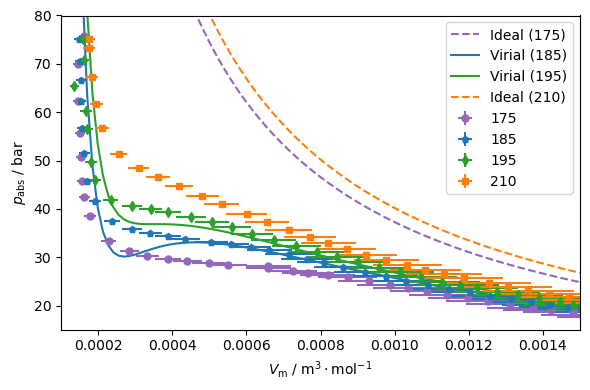

In [23]:
color_arr = ['tab:purple','tab:blue','tab:green','tab:orange']
x_range = np.linspace(0.1/1000,1.5/1000,100)
for i in range(4):
    if i != 0 and i != 3:
        T = theta_arr[i] + 273.15
        p2 = p_krit(T,x_range,B_T[i],C_T[i])
        plt.plot(x_range,p2/10**5,ls="-",label="Virial ("+str(theta_arr[i])+")",color=color_arr[i])
    if i == 0 or i == 3:
        T = theta_arr[i] + 273.15
        p2 = R*T/x_range
        plt.plot(x_range,p2/10**5,ls="--",color=color_arr[i],label="Ideal ("+str(theta_arr[i])+")")
    plt.errorbar(x=V_m[i],y=p_abs[i]/10**5,yerr=dp_abs[i]/10**5,xerr=dV_m[i],color=color_arr[i],label=str(theta_arr[i]),marker=marker_arr[i],markersize=5,ls="None")
plt.ylabel("$p_\mathrm{abs}$ / bar")
plt.xlabel("$V_\mathrm{m}$ / $\mathrm{m}^3\cdot\mathrm{mol}^{-1}$")
plt.xlim(0.1/1000,1.5/1000)
plt.legend()
plt.ylim(15,80)
plt.tight_layout()
plt.show()
plt.close()

---
Arved Dorst, Göttingen, __2021__.